# Processing data for living standards dashboard

In [1]:
# for data handling
import numpy as np 
import pandas as pd

# for static graphs
import matplotlib.pyplot as plt
import seaborn as sns

Defining functions to process

In [2]:
def transpose (df): 
    df = df.drop(["Unnamed: 65","Indicator Name", "Indicator Code", "Country Code"], axis = 1)
    transpose = df.transpose()
    return transpose

In [3]:
def transform (df): 
    df_transformed = df.rename(index ={"Country Name":"Year"})
    df_transformed.columns = df_transformed.iloc[0]
    df_transformed.drop("Year", axis = 0, inplace = True)
    df_transformed.index = pd.to_datetime(df_transformed.index, format = "%Y").year
    
    return df_transformed

In [4]:
def extract (main_df, orginal_df):
    extract = main_df.loc["1990":][["United States", "Japan", "Germany"]]
    extract = pd.melt(extract, value_vars=["United States", "Japan", "Germany"], var_name= "Country", 
                      value_name =orginal_df["Indicator Name"][0],  ignore_index = False)
    return extract

In [5]:
def depict (df):
    plt.figure(figsize=(15,4))
    sns.barplot(x = df.index, y =df.iloc[:, 1] , hue = "Country", data= df )

In [6]:
# import Intentional homicides (per 100,000 people)  data
# source - https://data.worldbank.org/indicator/VC.IHR.PSRC.P5
crime = pd.read_csv("Crime.csv", skiprows = 4)

# Transform data 
crime_transposed = transpose(crime)
crime_transform = transform(crime_transposed)
crime_extract = extract(crime_transform, crime)

# Save transformed data
crime_extract.to_csv("crime_extract.csv")

# Overview of transformed data
crime_extract.head()

,Country,"Intentional homicides (per 100,000 people)"
1990,United States,9.296355
1991,United States,9.704982
1992,United States,9.245474
1993,United States,9.450082
1994,United States,8.894865


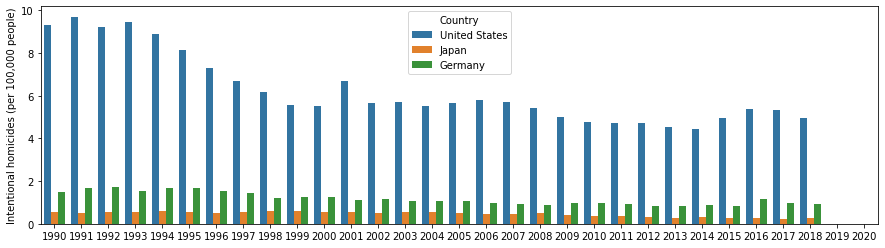

In [7]:
# Graph of crime data
depict(crime_extract)

In [8]:
# import GDP per capita data
# source -https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart
gdp = pd.read_csv("GDP.csv", skiprows=4)

# Transform data 
gdp_transposed = transpose(gdp)
gdp_transform = transform(gdp_transposed)
gdp_extract = extract(gdp_transform, gdp)

# Save transformed data
gdp_extract.to_csv("gdp_extract.csv")

# Overview of transformed data
gdp_extract.head()

,Country,GDP per capita (current US$)
1990,United States,23888.600009
1991,United States,24342.258905
1992,United States,25418.990776
1993,United States,26387.293734
1994,United States,27694.853416


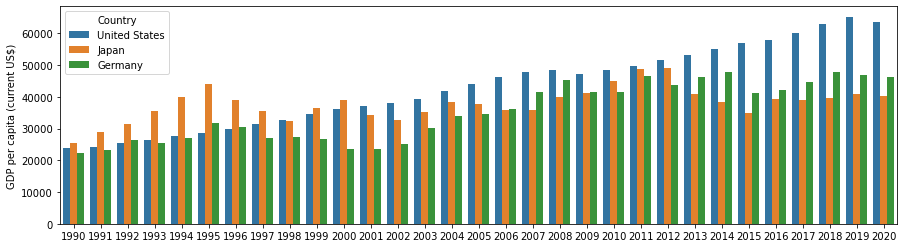

In [9]:
# Graph of GDP data
depict(gdp_extract)

In [10]:
# import Life expectancy at birth, total (years) data
# source -  https://data.worldbank.org/indicator/SP.DYN.LE00.IN?view=chart
life_exp = pd.read_csv("life expectancy.csv", skiprows= 4)

# Transform data 
life_exp_transposed = transpose(life_exp)
life_exp_transform = transform(life_exp_transposed)
life_exp_extract = extract(life_exp_transform, life_exp)

# Save transformed data
life_exp_extract.to_csv("life_exp_extract.csv")

# Overview of transformed data
life_exp_extract.head()

,Country,"Life expectancy at birth, total (years)"
1990,United States,75.214634
1991,United States,75.365854
1992,United States,75.617073
1993,United States,75.419512
1994,United States,75.619512


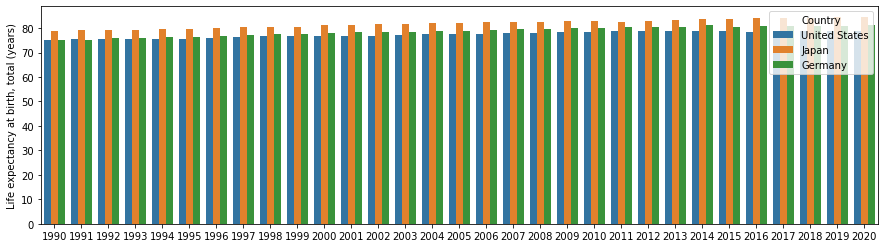

In [11]:
# Graph of life expectancy data
depict(life_exp_extract)

In [12]:
# import Working hours needed to exit poverty data
#source - https://data.oecd.org/emp/hours-worked.htm#
Exit_poverty = pd.read_csv("Working hours needed to exit poverty.csv")

# change column name for uniformity
Exit_poverty.rename(columns= {"LOCATION":"Country Code"}, inplace = True)

In [13]:
# make a country name and country code table
countries = pd.read_csv("Crime.csv", skiprows = 4)
country_codes =countries[["Country Name", "Country Code"]].drop_duplicates()

In [14]:
# merge country_codes table to Exit_poverty table
result = pd.merge(Exit_poverty, country_codes, how = "left", on="Country Code")
result.head()

,Country Code,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Country Name
0,AUS,WORKEXPOV,SNGLNOCHLD,HR_AVEWAGE,A,2001,6,NaN,Australia
1,AUS,WORKEXPOV,SNGLNOCHLD,HR_AVEWAGE,A,2002,8,NaN,Australia
2,AUS,WORKEXPOV,SNGLNOCHLD,HR_AVEWAGE,A,2003,9,NaN,Australia
3,AUS,WORKEXPOV,SNGLNOCHLD,HR_AVEWAGE,A,2004,11,NaN,Australia
4,AUS,WORKEXPOV,SNGLNOCHLD,HR_AVEWAGE,A,2005,13,NaN,Australia


In [15]:
# save table
result.to_csv("Exit_poverty.csv")